This notebook compares the intersect of DEGs across three experiments. The comparison is strictly at the significance derived from DESEq2, no further filter on low expression and fold-change.

The conclusions from the analysis are:
- 072
    - there is reasonable intersect on epi/nor/mix at 4 h. Specially on upregulated genes, not so much on downregulated genes.
    - there is no reasonable intersect on epi/nor/mix at 24 h.
    - TNFa at both 4 and 24 hours show reasonable intersect. It seems that exp 3 failed for TNFa at 24 hours. 
- 073
    - no reasonable intersect.
    


In [1]:
import os, pandas, matplotlib_venn

In [2]:
import matplotlib

# user-defined variables

In [3]:
# necio5
results_dir = '/Users/adrian/gd15/tmp/DEGs/'

In [4]:
# drangajokull
results_dir = '/home/adrian/projects/vigur/results/sequencing/DEGs/'
rss_hlmv_results_dir = '/home/adrian/projects/vigur/results/transcriptomics/deseq2_filtered/'

In [5]:
experiments = ['1', '2', '3']
trends = ['up', 'down']

# read result files

In [6]:
found = os.listdir(results_dir)
print(len(found))
result_files = [element for element in found if 'run' in element]
result_files.sort()

print('we should have 42 times two equals 84 files')
print('we have')
print(len(result_files))

86
we should have 42 times two equals 84 files
we have
84


# read previous results, RSS DEGs from transcriptomics

In [7]:
df = pandas.read_csv(
    rss_hlmv_results_dir+'experiment_three_concentration_five_time_four_up_filtered.tsv', 
    sep='\t', 
    skiprows=1)
rss_up_genes = df['ENSEMBL'].to_list()
print(len(rss_up_genes))

71


In [8]:
df = pandas.read_csv(
    rss_hlmv_results_dir+'experiment_three_concentration_five_time_four_down_filtered.tsv', 
    sep='\t', 
    skiprows=1)
rss_down_genes = df['ENSEMBL'].to_list()
print(len(rss_down_genes))

27


# working on run 72

In [9]:
run = '72'
timepoints = ['four', 'twentyfour']

# working on influence time

influence time
	 time four
		 experiment 1
			 run_72_time_four_vs_zero_exp_1_up.tsv
			 run_72_time_four_vs_zero_exp_1_down.tsv
			 90 29
		 experiment 2
			 run_72_time_four_vs_zero_exp_2_up.tsv
			 run_72_time_four_vs_zero_exp_2_down.tsv
			 117 43
		 experiment 3
			 run_72_time_four_vs_zero_exp_3_up.tsv
			 run_72_time_four_vs_zero_exp_3_down.tsv
			 233 132


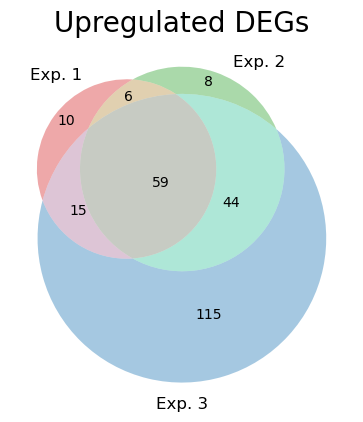

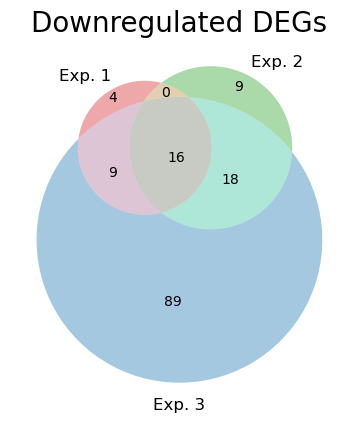

	 time twentyfour
		 experiment 1
			 run_72_time_twentyfour_vs_zero_exp_1_up.tsv
			 run_72_time_twentyfour_vs_zero_exp_1_down.tsv
			 11 3
		 experiment 2
			 run_72_time_twentyfour_vs_zero_exp_2_up.tsv
			 run_72_time_twentyfour_vs_zero_exp_2_down.tsv
			 2 2
		 experiment 3
			 run_72_time_twentyfour_vs_zero_exp_3_up.tsv
			 run_72_time_twentyfour_vs_zero_exp_3_down.tsv
			 82 6


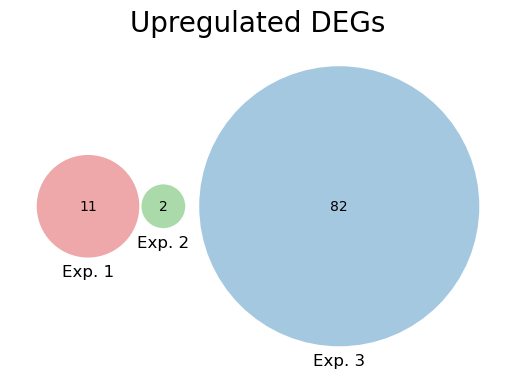

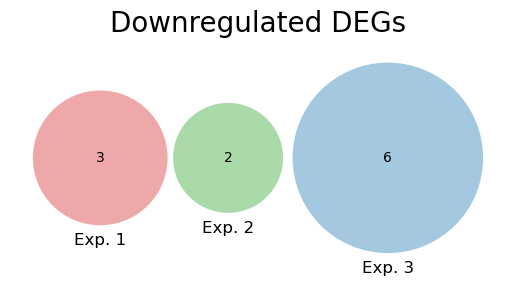

In [10]:
print('influence time')
for timepoint in timepoints:
    
    print('\t time', timepoint)
    
    # iterating over experiments
    ups = []; downs = []
    for experiment in experiments:
        print('\t\t experiment', experiment)
        
        DEG_files = [sub for sub in result_files if (run+'_time' in sub) & ('_'+timepoint+'_' in sub) & ('exp_'+experiment in sub)]
        DEG_files.sort()
        
        if len(DEG_files) != 2:
            raise ValueError('found more files than expected')
        
        up_file = DEG_files[1]
        path = results_dir + up_file
        df = pandas.read_csv(path, sep='\t', index_col=0)
        ensembl_IDs_up = df.index.to_list()
        
        down_file = DEG_files[0]
        path = results_dir + down_file
        df = pandas.read_csv(path, sep='\t', index_col=0)
        ensembl_IDs_down = df.index.to_list()
        
        print('\t\t\t', up_file)
        print('\t\t\t', down_file)
        print('\t\t\t', len(ensembl_IDs_up), len(ensembl_IDs_down))
        
        ups.append(set(ensembl_IDs_up)); downs.append(set(ensembl_IDs_down))
        
    # find the intersect
    matplotlib_venn.venn3([set(ups[0]), set(ups[1]), set(ups[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
    matplotlib.pyplot.title('Upregulated DEGs', fontsize=20)
    matplotlib.pyplot.show()
    
    matplotlib_venn.venn3([set(downs[0]), set(downs[1]), set(downs[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
    matplotlib.pyplot.title('Downregulated DEGs', fontsize=20)
    matplotlib.pyplot.show()

## working on influence treatment

In [11]:
treatments = ['five_epi', 'five_nor', 'mix', 'TNFa']

In [12]:
print('influence treatment')

influence treatment


five_epi four
	 experiment 1
			 run_72_treatment_five_epi_time_four_exp_1_up.tsv
			 run_72_treatment_five_epi_time_four_exp_1_down.tsv
			 85 17
	 experiment 2
			 run_72_treatment_five_epi_time_four_exp_2_up.tsv
			 run_72_treatment_five_epi_time_four_exp_2_down.tsv
			 67 9
	 experiment 3
			 run_72_treatment_five_epi_time_four_exp_3_up.tsv
			 run_72_treatment_five_epi_time_four_exp_3_down.tsv
			 106 10


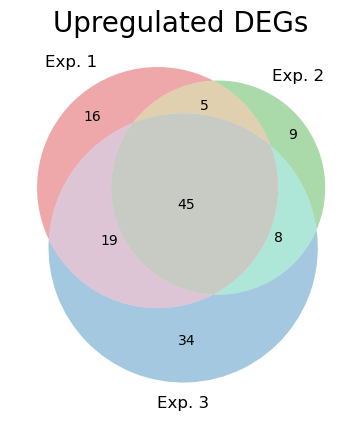

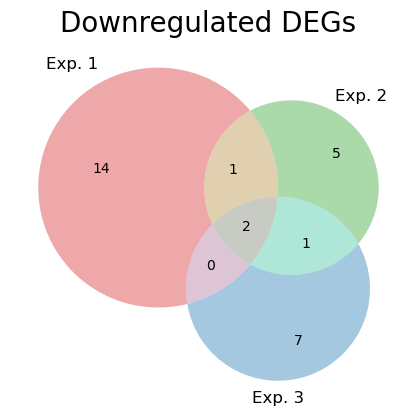

five_nor four
	 experiment 1
			 run_72_treatment_five_nor_time_four_exp_1_up.tsv
			 run_72_treatment_five_nor_time_four_exp_1_down.tsv
			 81 17
	 experiment 2
			 run_72_treatment_five_nor_time_four_exp_2_up.tsv
			 run_72_treatment_five_nor_time_four_exp_2_down.tsv
			 57 6
	 experiment 3
			 run_72_treatment_five_nor_time_four_exp_3_up.tsv
			 run_72_treatment_five_nor_time_four_exp_3_down.tsv
			 73 8


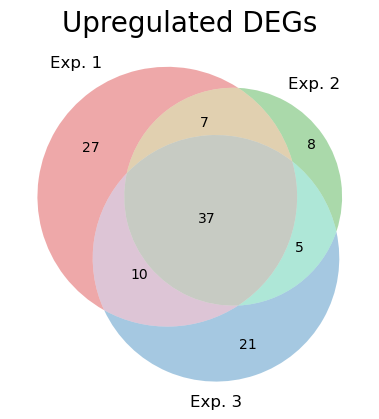

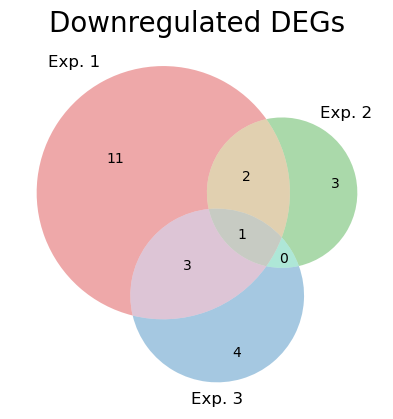

mix four
	 experiment 1
			 run_72_treatment_mix_time_four_exp_1_up.tsv
			 run_72_treatment_mix_time_four_exp_1_down.tsv
			 86 17
	 experiment 2
			 run_72_treatment_mix_time_four_exp_2_up.tsv
			 run_72_treatment_mix_time_four_exp_2_down.tsv
			 69 10
	 experiment 3
			 run_72_treatment_mix_time_four_exp_3_up.tsv
			 run_72_treatment_mix_time_four_exp_3_down.tsv
			 107 15


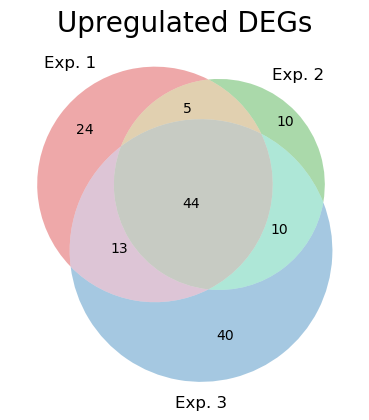

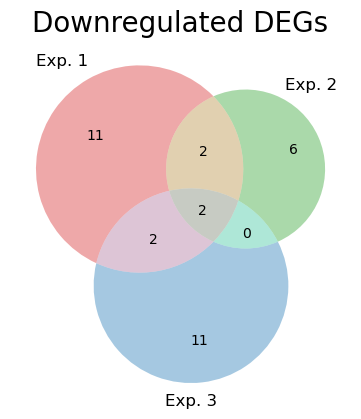

TNFa four
	 experiment 1
			 run_72_treatment_TNFa_time_four_exp_1_up.tsv
			 run_72_treatment_TNFa_time_four_exp_1_down.tsv
			 249 38
	 experiment 2
			 run_72_treatment_TNFa_time_four_exp_2_up.tsv
			 run_72_treatment_TNFa_time_four_exp_2_down.tsv
			 365 73
	 experiment 3
			 run_72_treatment_TNFa_time_four_exp_3_up.tsv
			 run_72_treatment_TNFa_time_four_exp_3_down.tsv
			 418 102


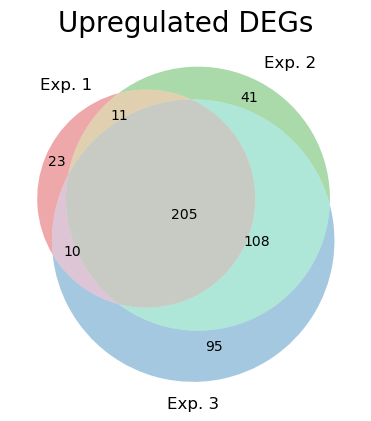

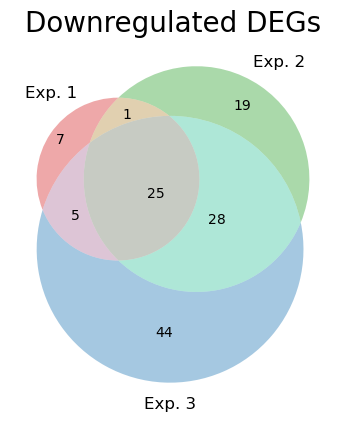

five_epi twentyfour
	 experiment 1
			 run_72_treatment_five_epi_time_twentyfour_exp_1_up.tsv
			 run_72_treatment_five_epi_time_twentyfour_exp_1_down.tsv
			 6 1
	 experiment 2
			 run_72_treatment_five_epi_time_twentyfour_exp_2_up.tsv
			 run_72_treatment_five_epi_time_twentyfour_exp_2_down.tsv
			 6 3
	 experiment 3
			 run_72_treatment_five_epi_time_twentyfour_exp_3_up.tsv
			 run_72_treatment_five_epi_time_twentyfour_exp_3_down.tsv
			 9 4


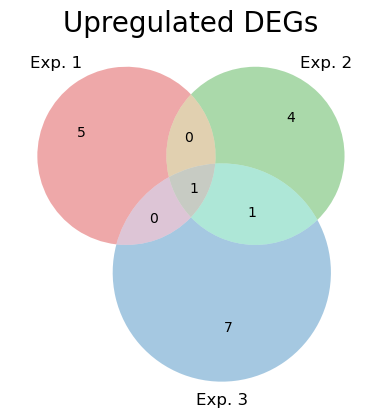

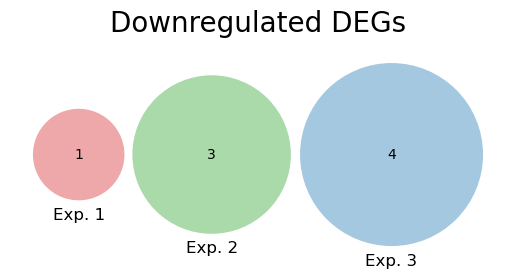

five_nor twentyfour
	 experiment 1
			 run_72_treatment_five_nor_time_twentyfour_exp_1_up.tsv
			 run_72_treatment_five_nor_time_twentyfour_exp_1_down.tsv
			 4 2
	 experiment 2
			 run_72_treatment_five_nor_time_twentyfour_exp_2_up.tsv
			 run_72_treatment_five_nor_time_twentyfour_exp_2_down.tsv
			 4 2
	 experiment 3
			 run_72_treatment_five_nor_time_twentyfour_exp_3_up.tsv
			 run_72_treatment_five_nor_time_twentyfour_exp_3_down.tsv
			 5 1


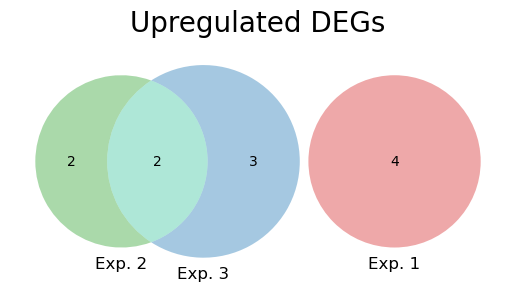

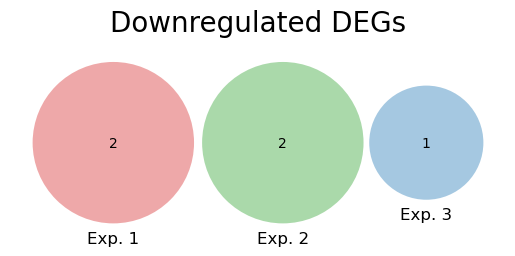

mix twentyfour
	 experiment 1
			 run_72_treatment_mix_time_twentyfour_exp_1_up.tsv
			 run_72_treatment_mix_time_twentyfour_exp_1_down.tsv
			 6 3
	 experiment 2
			 run_72_treatment_mix_time_twentyfour_exp_2_up.tsv
			 run_72_treatment_mix_time_twentyfour_exp_2_down.tsv
			 4 5
	 experiment 3
			 run_72_treatment_mix_time_twentyfour_exp_3_up.tsv
			 run_72_treatment_mix_time_twentyfour_exp_3_down.tsv
			 8 4


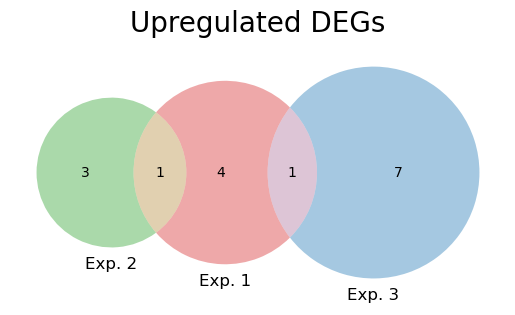

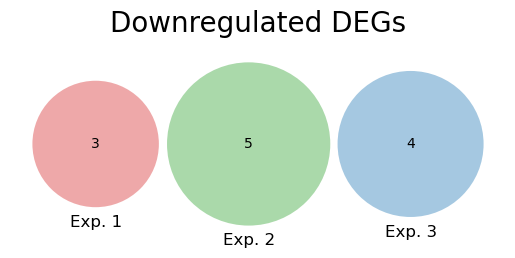

TNFa twentyfour
	 experiment 1
			 run_72_treatment_TNFa_time_twentyfour_exp_1_up.tsv
			 run_72_treatment_TNFa_time_twentyfour_exp_1_down.tsv
			 491 221
	 experiment 2
			 run_72_treatment_TNFa_time_twentyfour_exp_2_up.tsv
			 run_72_treatment_TNFa_time_twentyfour_exp_2_down.tsv
			 594 297
	 experiment 3
			 run_72_treatment_TNFa_time_twentyfour_exp_3_up.tsv
			 run_72_treatment_TNFa_time_twentyfour_exp_3_down.tsv
			 6 5


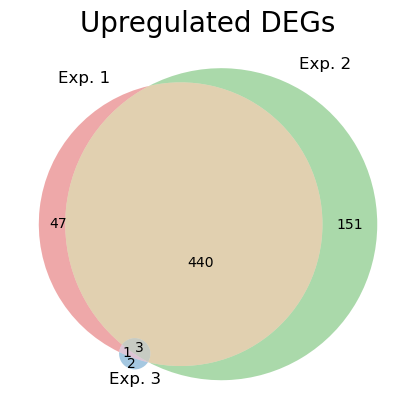

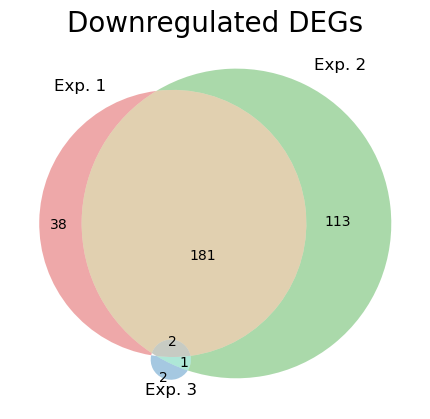

In [13]:
for timepoint in timepoints:
    for treatment in treatments:
        print(treatment, timepoint)
        
        # iterating over experiments
        ups = []; downs = []
        for experiment in experiments:
            print('\t experiment', experiment)
            
            DEG_files = [sub for sub in result_files if (run+'_treatment_'+treatment in sub) & ('_'+timepoint+'_' in sub) & ('exp_'+experiment in sub)]
            DEG_files.sort()
            
            if len(DEG_files) != 2:
                raise ValueError('found more files than expected')
        
            up_file = DEG_files[1]
            path = results_dir + up_file
            df = pandas.read_csv(path, sep='\t', index_col=0)
            ensembl_IDs_up = df.index.to_list()

            down_file = DEG_files[0]
            path = results_dir + down_file
            df = pandas.read_csv(path, sep='\t', index_col=0)
            ensembl_IDs_down = df.index.to_list()

            print('\t\t\t', up_file)
            print('\t\t\t', down_file)
            print('\t\t\t', len(ensembl_IDs_up), len(ensembl_IDs_down))

            ups.append(set(ensembl_IDs_up)); downs.append(set(ensembl_IDs_down))
            
        # find the intersect
        matplotlib_venn.venn3([set(ups[0]), set(ups[1]), set(ups[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
        matplotlib.pyplot.title('Upregulated DEGs', fontsize=20)
        matplotlib.pyplot.show()

        matplotlib_venn.venn3([set(downs[0]), set(downs[1]), set(downs[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
        matplotlib.pyplot.title('Downregulated DEGs', fontsize=20)
        matplotlib.pyplot.show()

# working on run 73

In [14]:
run = '73'

## working on influence time

influence time
	 experiment 1
		 run_73_time_four_vs_zero_exp_1_up.tsv
		 run_73_time_four_vs_zero_exp_1_down.tsv
		 5 8
	 experiment 2
		 run_73_time_four_vs_zero_exp_2_up.tsv
		 run_73_time_four_vs_zero_exp_2_down.tsv
		 2 2
	 experiment 3
		 run_73_time_four_vs_zero_exp_3_up.tsv
		 run_73_time_four_vs_zero_exp_3_down.tsv
		 0 5


/home/adrian/anaconda3/lib/python3.9/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


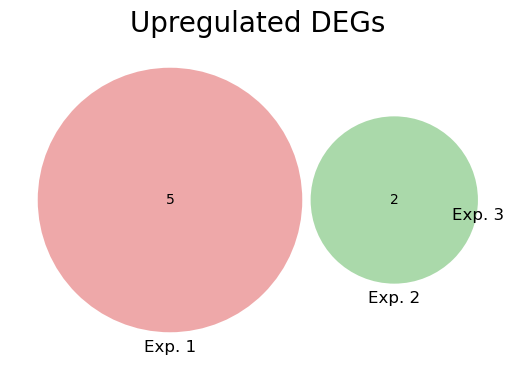

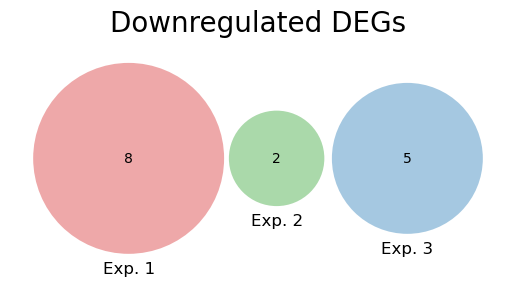

In [15]:
print('influence time')
timepoint = 'four'

# iterating over experiments
ups = []; downs = []
for experiment in experiments:
    print('\t experiment', experiment)

    DEG_files = [sub for sub in result_files if (run+'_time' in sub) & ('_'+timepoint+'_' in sub) & ('exp_'+experiment in sub)]
    DEG_files.sort()

    if len(DEG_files) != 2:
        raise ValueError('found more files than expected')

    up_file = DEG_files[1]
    path = results_dir + up_file
    df = pandas.read_csv(path, sep='\t', index_col=0)
    ensembl_IDs_up = df.index.to_list()

    down_file = DEG_files[0]
    path = results_dir + down_file
    df = pandas.read_csv(path, sep='\t', index_col=0)
    ensembl_IDs_down = df.index.to_list()

    print('\t\t', up_file)
    print('\t\t', down_file)
    print('\t\t', len(ensembl_IDs_up), len(ensembl_IDs_down))

    ups.append(set(ensembl_IDs_up)); downs.append(set(ensembl_IDs_down))

# find the intersect
matplotlib_venn.venn3([set(ups[0]), set(ups[1]), set(ups[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
matplotlib.pyplot.title('Upregulated DEGs', fontsize=20)
matplotlib.pyplot.show()

matplotlib_venn.venn3([set(downs[0]), set(downs[1]), set(downs[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
matplotlib.pyplot.title('Downregulated DEGs', fontsize=20)
matplotlib.pyplot.show()

## working on influence treatment

In [16]:
treatments = ['mix', 'ilo_only', 'mix_plus_ilo']

In [17]:
print('influence treatment')

influence treatment


mix four
	 experiment 1
	 run_73_treatment_mix_time_four_exp_1
		 run_73_treatment_mix_time_four_exp_1_up.tsv
		 run_73_treatment_mix_time_four_exp_1_down.tsv
		 1 1
	 experiment 2
	 run_73_treatment_mix_time_four_exp_2
		 run_73_treatment_mix_time_four_exp_2_up.tsv
		 run_73_treatment_mix_time_four_exp_2_down.tsv
		 3 3
	 experiment 3
	 run_73_treatment_mix_time_four_exp_3
		 run_73_treatment_mix_time_four_exp_3_up.tsv
		 run_73_treatment_mix_time_four_exp_3_down.tsv
		 24 3


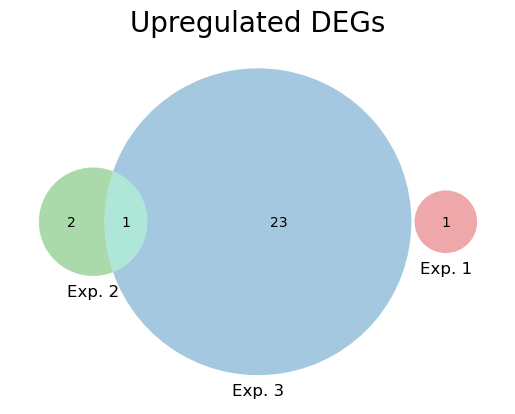

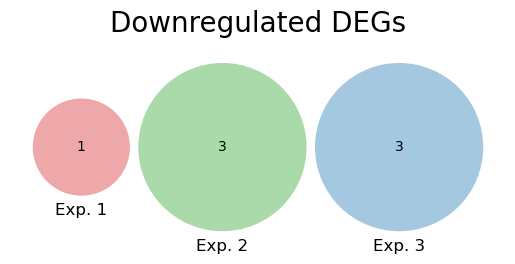

ilo_only four
	 experiment 1
	 run_73_treatment_ilo_only_time_four_exp_1
		 run_73_treatment_ilo_only_time_four_exp_1_up.tsv
		 run_73_treatment_ilo_only_time_four_exp_1_down.tsv
		 5 2
	 experiment 2
	 run_73_treatment_ilo_only_time_four_exp_2
		 run_73_treatment_ilo_only_time_four_exp_2_up.tsv
		 run_73_treatment_ilo_only_time_four_exp_2_down.tsv
		 4 2
	 experiment 3
	 run_73_treatment_ilo_only_time_four_exp_3
		 run_73_treatment_ilo_only_time_four_exp_3_up.tsv
		 run_73_treatment_ilo_only_time_four_exp_3_down.tsv
		 24 2


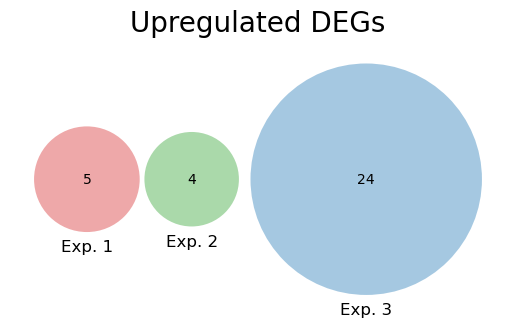

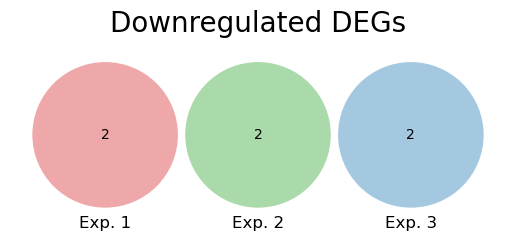

mix_plus_ilo four
	 experiment 1
	 run_73_treatment_mix_plus_ilo_time_four_exp_1
		 run_73_treatment_mix_plus_ilo_time_four_exp_1_up.tsv
		 run_73_treatment_mix_plus_ilo_time_four_exp_1_down.tsv
		 2 2
	 experiment 2
	 run_73_treatment_mix_plus_ilo_time_four_exp_2
		 run_73_treatment_mix_plus_ilo_time_four_exp_2_up.tsv
		 run_73_treatment_mix_plus_ilo_time_four_exp_2_down.tsv
		 17 5
	 experiment 3
	 run_73_treatment_mix_plus_ilo_time_four_exp_3
		 run_73_treatment_mix_plus_ilo_time_four_exp_3_up.tsv
		 run_73_treatment_mix_plus_ilo_time_four_exp_3_down.tsv
		 83 11


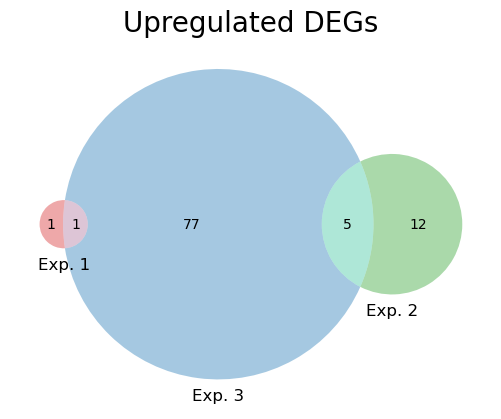

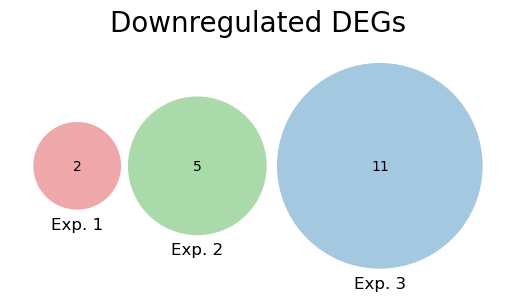

In [18]:
for treatment in treatments:
    print(treatment, timepoint)

    # iterating over experiments
    ups = []; downs = []
    for experiment in experiments:
        print('\t experiment', experiment)

        tag = 'run_' + run + '_treatment_' + treatment + '_time_' + timepoint + '_exp_' + experiment
        print('\t', tag)

        DEG_files = [sub for sub in result_files if tag in sub]
        DEG_files.sort()

        if len(DEG_files) != 2:
            print(DEG_files)
            raise ValueError('found more files than expected')

        up_file = DEG_files[1]
        path = results_dir + up_file
        df = pandas.read_csv(path, sep='\t', index_col=0)
        ensembl_IDs_up = df.index.to_list()

        down_file = DEG_files[0]
        path = results_dir + down_file
        df = pandas.read_csv(path, sep='\t', index_col=0)
        ensembl_IDs_down = df.index.to_list()

        print('\t\t', up_file)
        print('\t\t', down_file)
        print('\t\t', len(ensembl_IDs_up), len(ensembl_IDs_down))

        ups.append(set(ensembl_IDs_up)); downs.append(set(ensembl_IDs_down))

    # find the intersect
    matplotlib_venn.venn3([set(ups[0]), set(ups[1]), set(ups[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
    matplotlib.pyplot.title('Upregulated DEGs', fontsize=20)
    matplotlib.pyplot.show()

    matplotlib_venn.venn3([set(downs[0]), set(downs[1]), set(downs[2])], set_labels=['Exp. 1', 'Exp. 2', 'Exp. 3'], set_colors = ['tab:red', 'tab:green', 'tab:blue'])
    matplotlib.pyplot.title('Downregulated DEGs', fontsize=20)
    matplotlib.pyplot.show()